In [35]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [36]:
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

In [37]:
print("shape of data : ", fashion_mnist['data'].shape)
print("shape of target : ", fashion_mnist['target'].shape)

shape of data :  (70000, 784)
shape of target :  (70000,)


In [38]:
X = fashion_mnist['data'].to_numpy()
Y = fashion_mnist['target'].to_numpy()

In [39]:
scalar = StandardScaler()
standard_X = scalar.fit_transform(X)

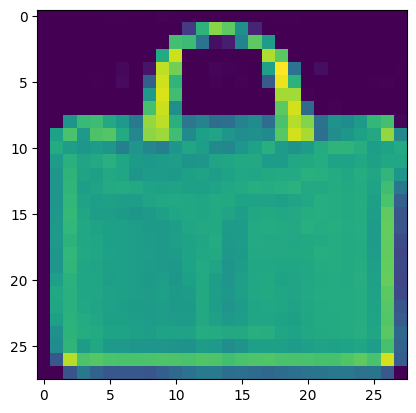

In [40]:
random_index = np.random.randint(0, len(Y))
plt.imshow(X[random_index].reshape(28, 28))
plt.show()

In [41]:
sample_covariance_matrix = np.cov(standard_X, rowvar=False )

In [42]:
eigen_vals, eigen_vecs = np.linalg.eig(sample_covariance_matrix)
print("eigen values : ", eigen_vals.shape)
print("eigen vectors : ", eigen_vecs.shape)

eigen values :  (784,)
eigen vectors :  (784, 784)


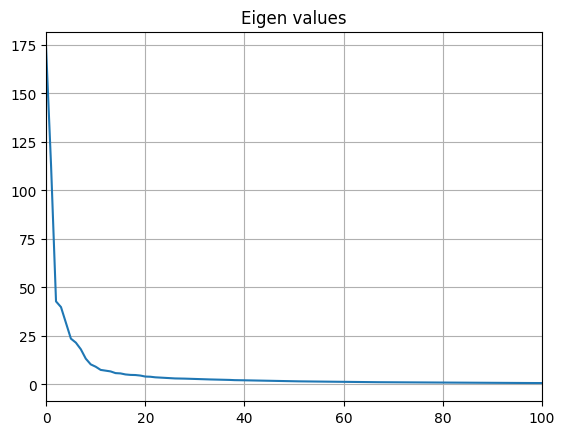

In [43]:
sorted_idx = np.argsort(eigen_vals)[::-1]
eigen_vals = eigen_vals[sorted_idx]
eigen_vecs = eigen_vecs[sorted_idx]
plt.plot(eigen_vals)
plt.grid()
plt.xlim([0, 100])
plt.title('Eigen values')
plt.show()

In [44]:
U = eigen_vecs[:, :25]
U.shape

(784, 25)

In [45]:
X_PCA = np.dot(standard_X, U)

In [46]:
X_PCA.shape

(70000, 25)

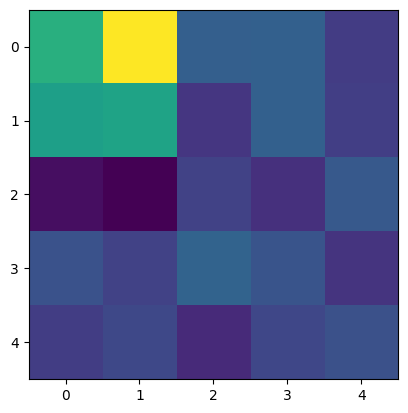

In [47]:
plt.imshow(X_PCA[random_index].reshape(5, 5))
plt.show()

In [48]:
reconstruced_X = np.dot(X_PCA, U.T)

In [49]:
reconstruced_X.shape

(70000, 784)

In [50]:
original_reconstructed = scalar.inverse_transform(reconstruced_X)

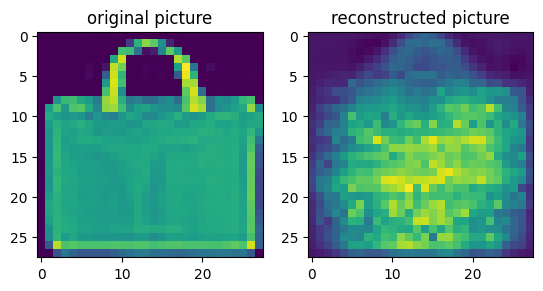

In [51]:
plt.subplot(1, 2, 1)
plt.imshow(X[random_index].reshape(28, 28))
plt.title('original picture')
plt.subplot(1, 2, 2)
plt.imshow(original_reconstructed[random_index].reshape(28, 28))
plt.title('reconstructed picture')
plt.show()